# HW2

In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

#### Implementing Simple Artificial Neural Network for multiclass classification

In [2]:
class SingleLayerNetwork:
    """ A single layer neural net for multiclass classification. """
    
    def __init__(self):
        self.weights = None
        self.bias = None
        self.learning_rate = None
    
    def fit(self, X, y, epoch=10, learning_rate=0.00001):
        """
        Learns the net's parameters based on provided labelled data.
        
        :param X: the train objects
        :param y: the one-hot encoded classes of given objects
        :param epoch: the number of passes over the entire dataset
        :param learning_rate: size of gradient descent step
        """
        # randomly initialize net's weights
        self._initialize_net(X, y, learning_rate)
        loss = []

        for i in range(epoch):
            # shuffle data before each epoch
            _X, _y = shuffle(X, y)
            
            for obj, label in zip(_X, _y):
                # make a gradient descent step
                diff = self._update_weights(obj, label)
            
            # compute categorical cross-entropy loss
            loss.append(self._cross_entropy_loss(X, y))
        
        return loss

    def predict(self, X):
        """
        Predicts the class for given objects.
        
        :param X: an array of objects
        :returns: predicted classes of given objects in one-hot encoding
        """
        scores = self._predict(X)
        return self.labels[np.argmax(scores, axis=1)]

    def _initialize_net(self, X, y, learning_rate):
        self.labels = np.unique(y, axis=0)[::-1]
        self.learning_rate = learning_rate
        shape = (X.shape[1], self.labels.shape[0])
        self.bias = np.random.uniform(-0.0001, 0.0001, len(self.labels))
        self.weights = np.random.uniform(-0.0001, 0.0001, shape)

    def _predict(self, X):
        return self._softmax(X.dot(self.weights) + self.bias)

    def _backprop(self, X, y, scores):
        diff = scores - y
        self.weights -= self.learning_rate * np.outer(diff, X).T
        self.bias -= self.learning_rate * diff
        return diff

    def _update_weights(self, X, y):
        scores = self._predict(X)     # forward pass
        return self._backprop(X, y, scores)  # gradient backpropagation

    def _softmax(self, scores):
        e_x = np.exp(scores - np.max(scores))
        return e_x / e_x.sum(axis=0)
    
    def _cross_entropy_loss(self, X, y):
        scores = self._predict(X)
        return -np.sum(np.log(scores * y + 1e-30)) / len(y)


#### Loading and visualizing the MNIST dataset

In [3]:
mnist = input_data.read_data_sets("data/MNIST", one_hot=True)

Extracting data/MNIST\train-images-idx3-ubyte.gz
Extracting data/MNIST\train-labels-idx1-ubyte.gz
Extracting data/MNIST\t10k-images-idx3-ubyte.gz
Extracting data/MNIST\t10k-labels-idx1-ubyte.gz


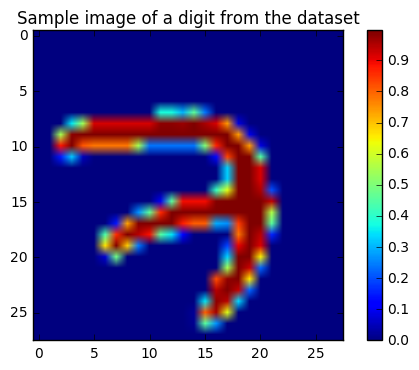

In [4]:
plt.imshow(mnist.train.images[0].reshape((28, 28)))
plt.title("Sample image of a digit from the dataset")
plt.colorbar()

#### Training the net to classify MNIST

In [5]:
# set up and train the net
net = SingleLayerNetwork()
loss = net.fit(mnist.train.images[:5000], mnist.train.labels[:5000], epoch=50)

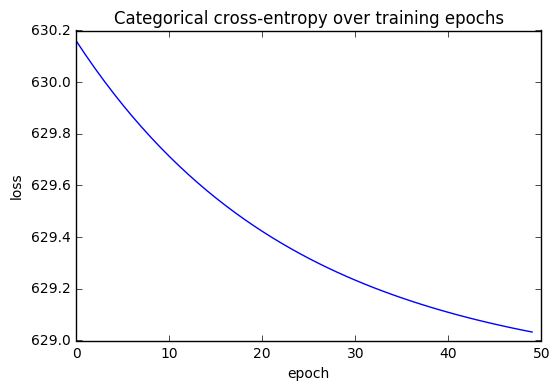

In [6]:
# visualize loss minimization over training epochs
plt.title("Categorical cross-entropy over training epochs")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(range(50), loss)

In [7]:
# compute classification accuracy on test images
y_pred = net.predict(mnist.test.images[:100])
y_true = mnist.test.labels[:100]
correct = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))
print('accuracy:', 100 * correct / len(y_true), '%')

accuracy: 80.0 %
